# Εργασία στο Μάθημα Αναγνώριση Προτύπων - Μέρη Α, Β, Γ
## Ομάδα 28
### Ονοματεπώνυμα Φοιτητών:  Μαχμουτάϊ Έλενα, Τσουκαλά Ναταλία 

## Part A

The purpose of this assignment is to employ the Maximum Likelihood technique to train a Bayesian classifier using normal distributions. 

In the analysis we will perform 2 scenarios: one where a common covariance table is shared among the 3 classes, and another where each class possesses its own unique covariance table. We also will involve plotting the test data, highlighting instances of misclassification in both cases, and visually representing the decision regions associated with each class.

### Maximum Likelihood technique with Common Covariance matrix

First thing we do is to load the data from the CSV file and split them into training and testing with 50/50 chance. 

Then, convert our data into a NumpPy array so it is easier to perform operations.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)
data = data.values  # Convert DataFrame to NumPy array

#printing the data to check if everything worked well (optional)
print(data)

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

[[ 1.8036    4.4229    3.      ]
 [ 3.4615    4.1436    2.      ]
 [ 2.1873    3.9964    1.      ]
 [ 3.0933    2.9056    1.      ]
 [ 1.7586    2.4109    1.      ]
 [ 1.3935    3.3955    3.      ]
 [-0.25885  -0.30159   1.      ]
 [ 7.1342    4.0605    1.      ]
 [ 3.1281    3.4291    2.      ]
 [ 5.7726    0.95443   2.      ]
 [ 1.6966    2.3042    1.      ]
 [ 4.5855    6.8982    1.      ]
 [ 1.9932    3.8719    1.      ]
 [ 1.8076    1.4564    1.      ]
 [ 2.5472    5.1554    3.      ]
 [ 4.9085    3.5222    2.      ]
 [ 4.8933    3.7063    1.      ]
 [ 0.85293   0.56615   1.      ]
 [ 2.1049    2.9689    1.      ]
 [ 3.1312    3.5776    2.      ]
 [ 1.2831    3.6174    3.      ]
 [-0.64185   4.9521    3.      ]
 [ 6.1643    5.7793    1.      ]
 [ 0.79251   1.9034    1.      ]
 [ 5.131     3.2936    2.      ]
 [ 3.9074    4.0554    2.      ]
 [ 6.044     1.5146    2.      ]
 [ 5.9782    5.8386    1.      ]
 [ 4.8381    3.1233    2.      ]
 [ 0.92854   5.4136    3.      ]
 [ 1.561  

We define our naive bayes function that uses common covariance for each of the 3 classes. 

We calculate the mean of each column for class and the covariance matrix for the entire dataset X.

We also calculate the prior probability for each unique class in y.

In [45]:
def fit_bayes(X, y):

    class_means = [np.mean(X[y == c], axis=0) for c in np.unique(y)]
    common_covariance = np.cov(X, rowvar=False)
    class_priors = [np.mean(y == c) for c in np.unique(y)]
    
    return class_means, common_covariance, class_priors

Now we define a function that makes predictions using a trained Gaussian Bayes classifier.

In [46]:
def predict_bayes(X, class_means, common_covariance, class_priors):
    predictions = []
    for l in X:
         # For each class, calculate the likelihood of the sample
        likelihoods = [multivariate_normal.pdf(l, mean=mean, cov=common_covariance) for mean in class_means]
        
        # Calculate the posterior probability for each class
        posteriors = [likelihood * prior for likelihood, prior in zip(likelihoods, class_priors)]

        # Select the class with the highest posterior probability as the predicted class
        predictions.append(np.argmax(posteriors) + 1)
    return np.array(predictions)

We train and predict our bayes classifier with our data.

In [47]:
class_means, common_covariance, class_priors = fit_bayes(X_train, y_train)
y_pred = predict_bayes(X_test, class_means, common_covariance, class_priors)

We plot our data by defining the decision regions and calculate the average classification error.

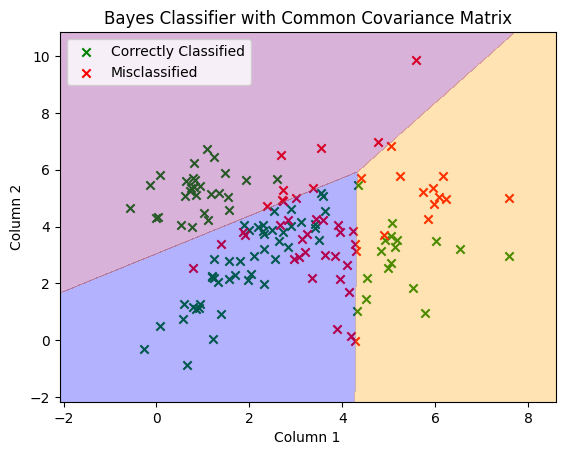

Average Classification Error: 35.00%


In [48]:
# Plot the test data with misclassifications highlighted
plt.scatter(X_test[y_test == y_pred, 0], X_test[y_test == y_pred, 1], c='green', marker='x', label='Correctly Classified')
plt.scatter(X_test[y_test != y_pred, 0], X_test[y_test != y_pred, 1], c='red', marker='x', label='Misclassified')

# Plot decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on a grid of points
Z = predict_bayes(np.c_[xx.ravel(), yy.ravel()], class_means, common_covariance, class_priors)
Z = Z.reshape(xx.shape)

# Plot decision boundaries with different colors for each class
plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 1, 2, 3], colors=['blue', 'orange', 'purple'])

plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Bayes Classifier with Common Covariance Matrix')
plt.legend()
plt.show()

# Calculate the average classification error
classification_error = np.mean(y_test != y_pred)
print(f'Average Classification Error: {classification_error:.2%}')

### Maximum Likelihood technique with Different Covariance matrix

For this technique we implemented a Gaussian Bayesian classifier with different covariance tables for each class.

In [49]:
import numpy as np
from scipy.stats import multivariate_normal

# Define Naive Bayes classifier functions with different covariance matrices
def fit_bayes_different_covariance(X, y):
    class_means = [np.mean(X[y == c], axis=0) for c in np.unique(y)]
    class_covariances = [np.cov(X[y == c], rowvar=False) for c in np.unique(y)]
    class_priors = [np.mean(y == c) for c in np.unique(y)]
    return class_means, class_covariances, class_priors

Then we predict the class labels using a Bayes classifier with different covariance matrices.

In [50]:
def predict_bayes_different_covariance(X, class_means, class_covariances, class_priors, y_true):
    predictions = []
    misclassified_indices = []

    # Iterate over input instances and true labels
    for x, true_label in zip(X, y_true):
        # Calculate likelihoods for each class
        likelihoods = [multivariate_normal.pdf(x, mean=mean, cov=covariance) for mean, covariance in zip(class_means, class_covariances)]
        
        # Calculate posteriors by multiplying likelihoods with class priors
        posteriors = [likelihood * prior for likelihood, prior in zip(likelihoods, class_priors)]
        
        # Predicted class is the one with the highest posterior probability
        predicted_class = np.argmax(posteriors) + 1
        predictions.append(predicted_class)

        # Track misclassified instances
        if predicted_class != true_label:
            misclassified_indices.append(true_label)
    
    return np.array(predictions), misclassified_indices

In [51]:
# Train the Naive Bayes classifier with different covariance matrices
class_means_diff_covariance, class_covariances_diff, class_priors_diff = fit_bayes_different_covariance(X_train, y_train)

# Make predictions on the test set
y_pred_diff_covariance, misclassified_indices = predict_bayes_different_covariance(X_test, class_means_diff_covariance, class_covariances_diff, class_priors_diff, y_test)

# Calculate the average classification error
classification_error = np.mean(y_test != y_pred_diff_covariance)
print(f'Average Classification Error: {classification_error:.2%}')

Average Classification Error: 17.86%


We visualize our data and define the decision regions.

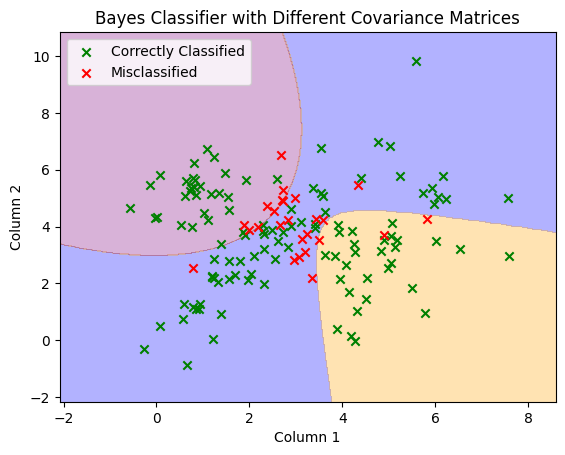

In [43]:
# Make predictions on a grid of points
Z = np.zeros(xx.shape)  # Initialize Z with zeros

# Loop through each point in the grid
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        # Extract the coordinates of the current point
        point = np.array([xx[i, j], yy[i, j]])

        # Make a prediction for the current point using the Naive Bayes classifier
        prediction, _ = predict_bayes_different_covariance(point.reshape(1, -1), class_means_diff_covariance, class_covariances_diff, class_priors_diff, y_test)

        # Directly assign the predicted class to the corresponding position in Z
        Z[i, j] = prediction[0]

# Plot decision boundaries with different colors for each class
plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 1, 2, 3], colors=['blue', 'orange', 'purple'])

# Scatter plot for correctly and misclassified points
correctly_classified = X_test[y_test == y_pred_diff_covariance]
misclassified = X_test[y_test != y_pred_diff_covariance]

# Plot correctly classified points in green
plt.scatter(correctly_classified[:, 0], correctly_classified[:, 1], c='green', marker='x', label='Correctly Classified')

# Plot misclassified points in red
plt.scatter(misclassified[:, 0], misclassified[:, 1], c='red', marker='x', label='Misclassified')

# Set labels and title for the plot
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Bayes Classifier with Different Covariance Matrices')

# Display legend for the plot
plt.legend()

# Show the plot
plt.show()

sumperasmata +  Ποια από τις δύο παραπάνω προσεγγίσεις δίνει το καλύτερο αποτέλεσμα;

## Part B

The purpose of this part is to train a K-NN classifier using the same training set as the previous part and compare the results. 

First we import our data set as previously and split it into training and test sets with a 50%-50% ratio.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#import our data from our local destination
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)

#Convert our data to numpy arrays for better manipulation
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

We define the `train_and_evaluate_knn(k, X_train, X_test, y_train, y_test)` function to train a K-NN classifier and calculate the average error on the testing data.

In [40]:
# Function to train k-NN classifier and calculate error
def train_and_evaluate_knn(k, X_train, X_test, y_train, y_test):
    
    # Initialize the KNeighborsClassifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict labels for the test set
    y_pred = knn.predict(X_test)
    
    # Calculate and return the classification error
    error = 1 - accuracy_score(y_test, y_pred)
    return knn, error

And then we plot the average classification errors for k = 1,...10 in the following graph based on the output of the train_and_evaluate function.

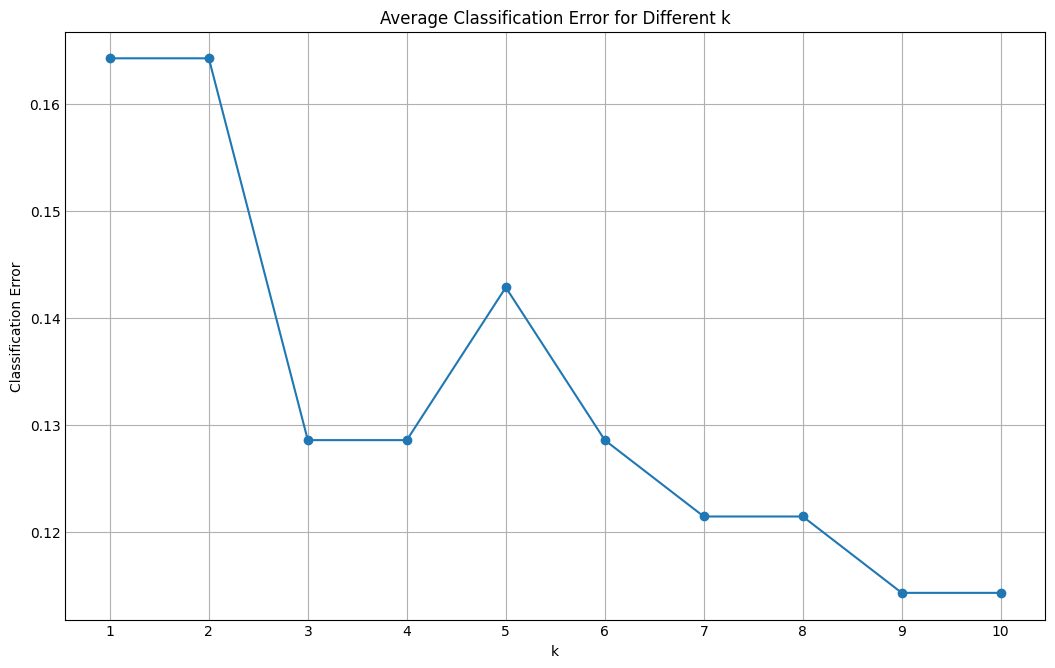

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Train k-NN classifier for k = 1 to 10 and calculate errors
errors = []
for k in range(1, 11):
    knn, error = train_and_evaluate_knn(k, X_train, X_test, y_train, y_test)
    errors.append(error)

# Plotting the errors for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), errors, marker='o')
plt.title('Average Classification Error for Different k')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

From the graph we notice that the average error decreases as the k value increases untill the value of `k = 9` where we notice that the average error remains steady for a while. We also notice that the biggest value turnaround occurs for `k = 2` to `k = 3`.

We define our `knn_plot_decision_regions` funtion that is responsible for plotting our decision regions for our different data classes.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def knn_plot_decision_regions(X, y, classifier, resolution=0.02):
    # Define markers, colors, and colormap
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Determine the plot boundaries
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Predict the class labels for each point in the meshgrid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot decision regions
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

Then define the funtion `plot_data_into_regions` that is responsible for creating the plot that we defined earlier.

In [43]:

def plot_data_into_regions(k, error, X, y, clf):
    print(f"Average Classification Error for k = {k}: {error:.2%}")
    
    # Create a figure for the plot
    plt.figure(figsize=(8, 6))

    # Plot decision regions using the provided classifier (clf)
    knn_plot_decision_regions(X.values, y.values, clf)

    # Add title and axis labels to the plot and then show it 
    plt.title(f'Decision Regions for k = {k}')
    plt.xlabel('Column 1')
    plt.ylabel('Column 2')
    plt.legend(loc='upper left')
    plt.show()

We call our functions for k in 1, ... 10 and calculate the average error for each k value and plot the descision regions using the funtion `plot_data_into_regions`.

Average Classification Error for k = 1: 16.43%


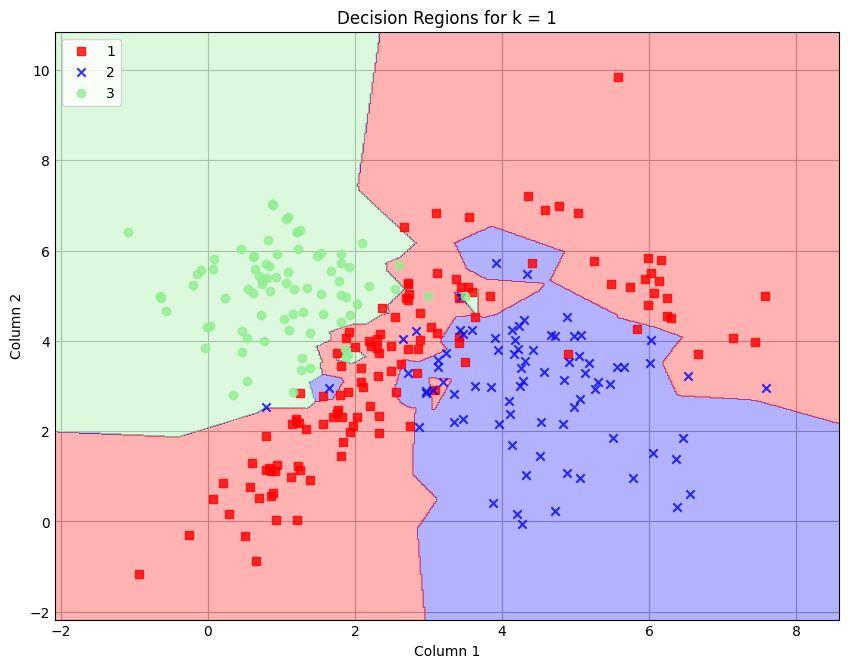

In [44]:
# Train the k-NN classifier and calculate error
knn_classifier, error = train_and_evaluate_knn(1, X_train, X_test, y_train, y_test)
plot_data_into_regions(1, error, X, y, knn_classifier)

Average Classification Error for k = 2: 16.43%


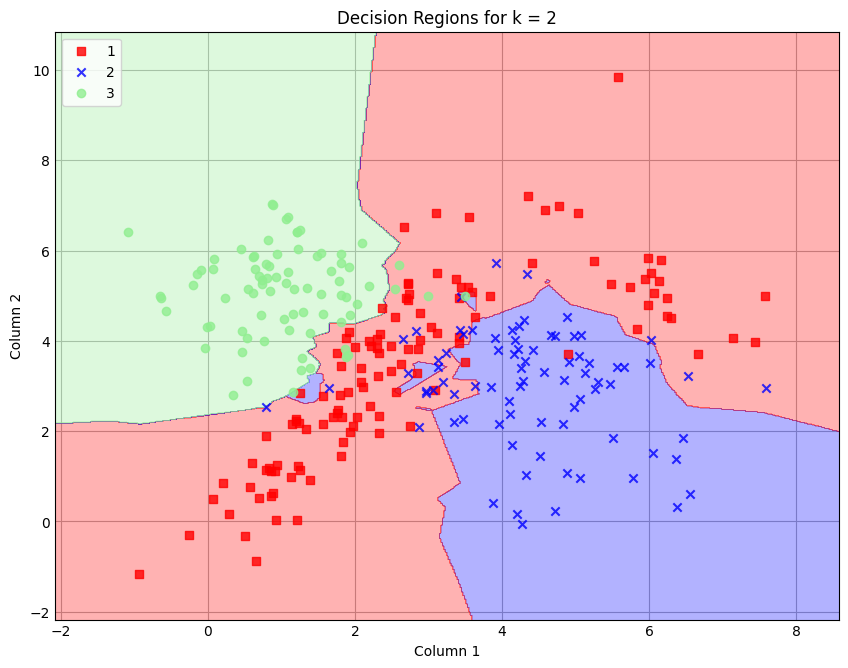

In [45]:
knn_classifier, error = train_and_evaluate_knn(2, X_train, X_test, y_train, y_test)
plot_data_into_regions(2, error, X, y, knn_classifier)

Average Classification Error for k = 3: 12.86%


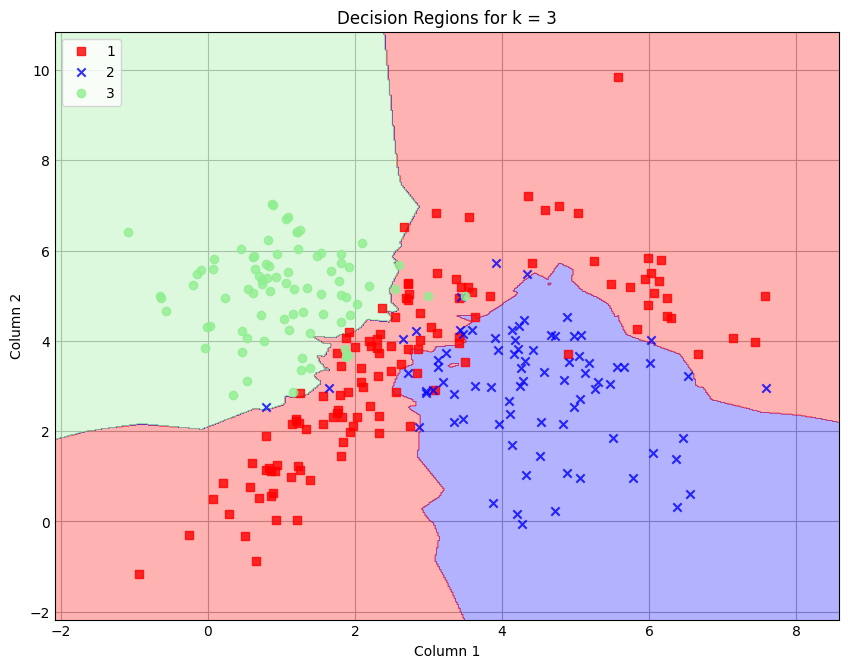

In [46]:
knn_classifier, error = train_and_evaluate_knn(3, X_train, X_test, y_train, y_test)
plot_data_into_regions(3, error, X, y, knn_classifier)

Average Classification Error for k = 4: 12.86%


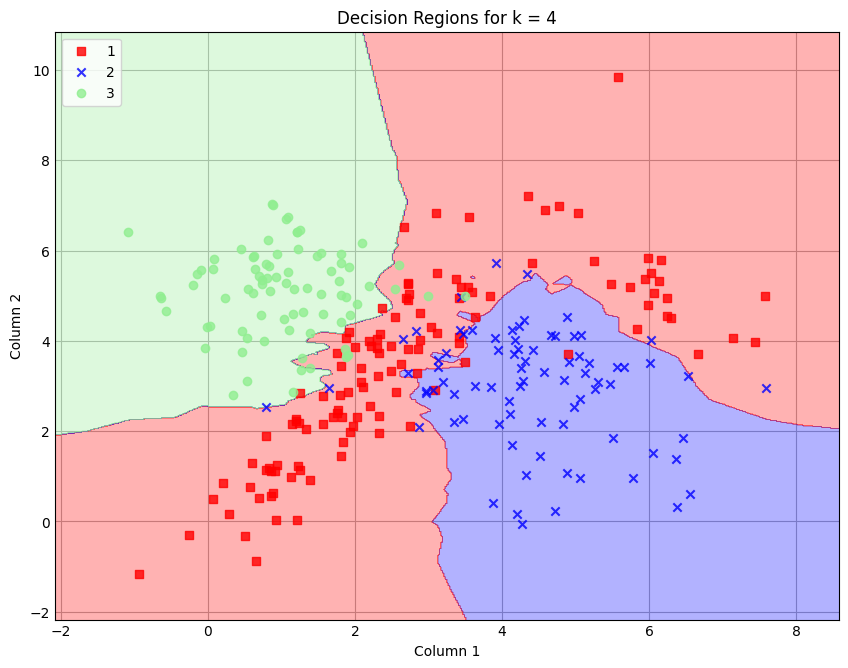

In [47]:
knn_classifier, error = train_and_evaluate_knn(4, X_train, X_test, y_train, y_test)
plot_data_into_regions(4, error, X, y, knn_classifier)

Average Classification Error for k = 5: 14.29%


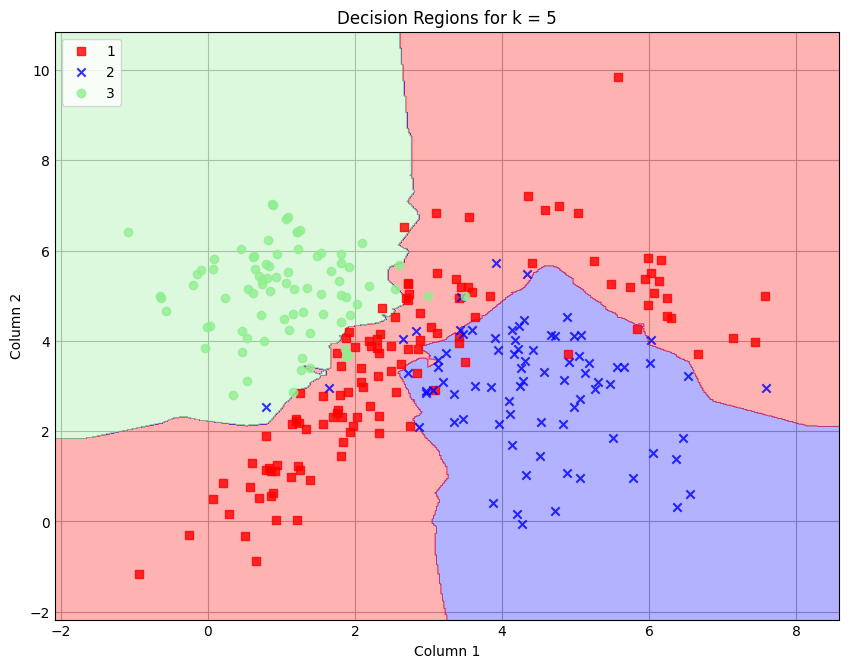

In [48]:
knn_classifier, error = train_and_evaluate_knn(5, X_train, X_test, y_train, y_test)
plot_data_into_regions(5, error, X, y, knn_classifier)

Average Classification Error for k = 6: 12.86%


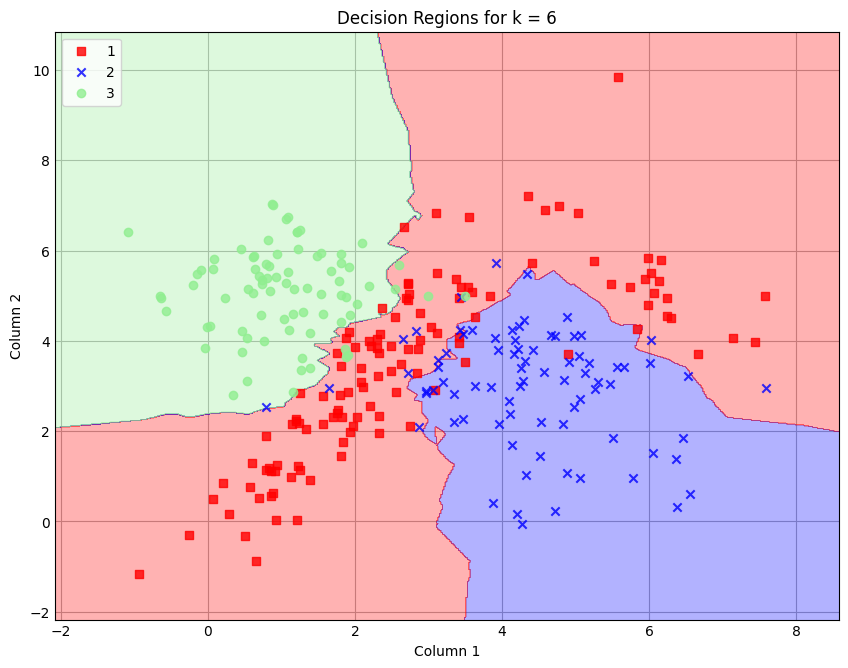

In [49]:
knn_classifier, error = train_and_evaluate_knn(6, X_train, X_test, y_train, y_test)
plot_data_into_regions(6, error, X, y, knn_classifier)

Average Classification Error for k = 7: 12.14%


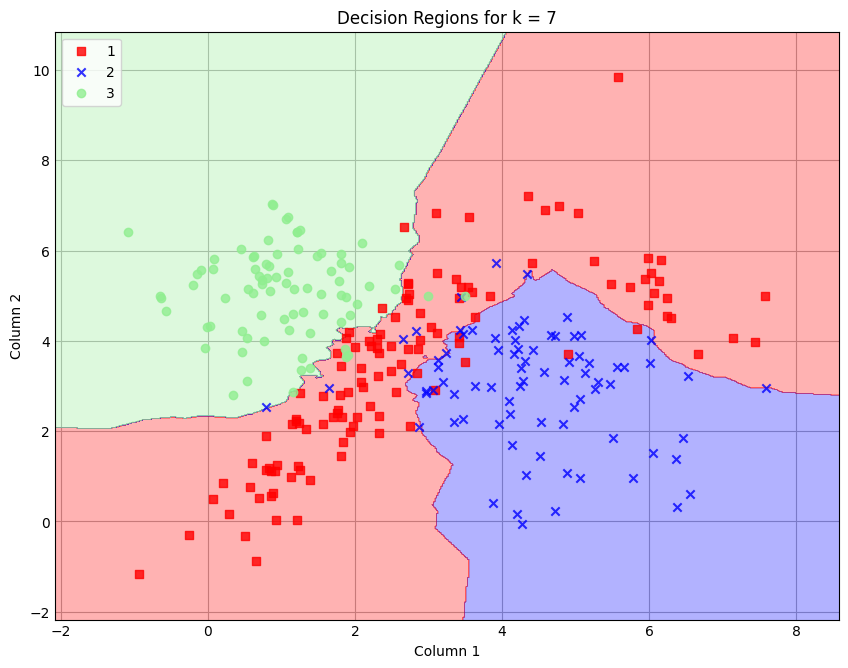

In [50]:
knn_classifier, error = train_and_evaluate_knn(7, X_train, X_test, y_train, y_test)
plot_data_into_regions(7, error, X, y, knn_classifier)

Average Classification Error for k = 8: 12.14%


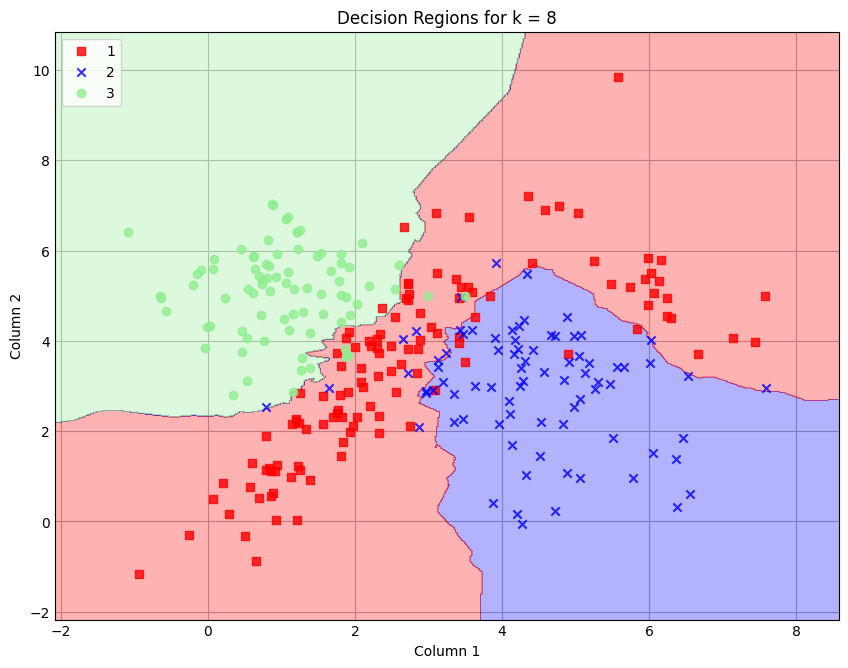

In [51]:
knn_classifier, error = train_and_evaluate_knn(8, X_train, X_test, y_train, y_test)
plot_data_into_regions(8, error, X, y, knn_classifier)

Average Classification Error for k = 9: 11.43%


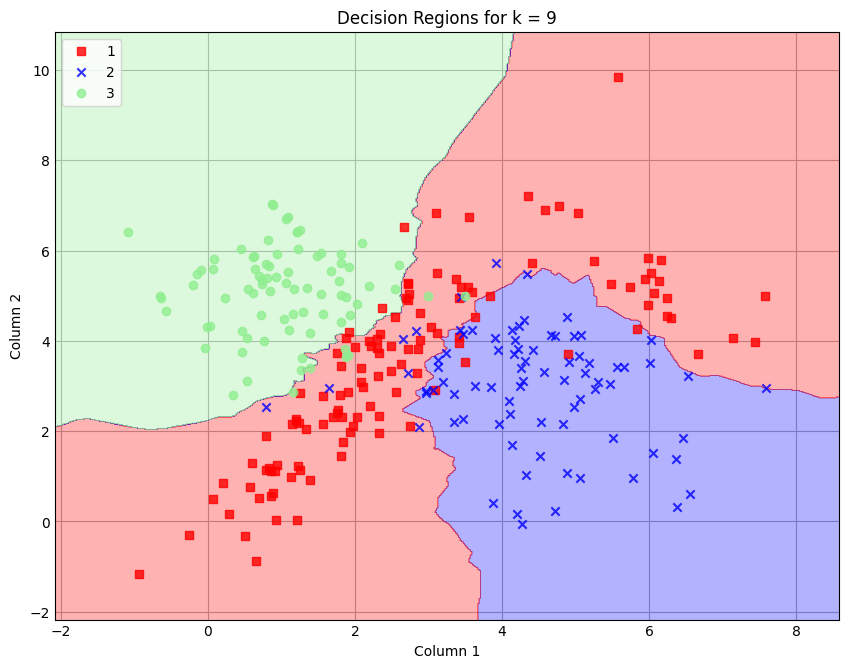

In [52]:
knn_classifier, error = train_and_evaluate_knn(9, X_train, X_test, y_train, y_test)
plot_data_into_regions(9, error, X, y, knn_classifier)

Average Classification Error for k = 10: 11.43%


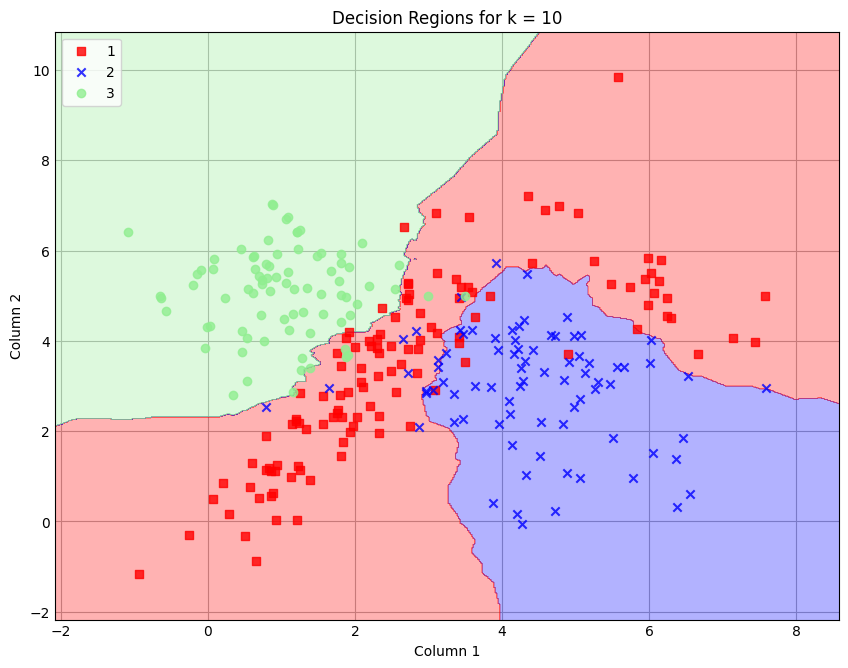

In [53]:
knn_classifier, error = train_and_evaluate_knn(10, X_train, X_test, y_train, y_test)
plot_data_into_regions(10, error, X, y, knn_classifier)

## Symperasmata + Sugkrish me ta parapanw apotelesmata gia Maximun Likelihood 

## Part C

The purpose of the third part of the deliverable is to use an SVM classifier in order to classify the data from the datesetCTest.csv file.

To do so we firstly load the data from the csv file and separate it into train and test data in the same way as in the previous parts.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None) #We match the path to the file destination
data = data.values 

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

We then import the 'scikit-learn' library that contains the SVM linear classifier and the 'time' library in order to be able to calculate the time our classifier needs to train the model and make predictions on the data and fit out data into our classifier.

In [2]:
from sklearn import svm

linear_classifier = svm.SVC(kernel= 'linear')
linear_classifier.fit(X_train, y_train)

SVC(kernel='linear')

We instruct the classifier to generate predictions, measuring the average error on the training data.

In [3]:
from sklearn.metrics import accuracy_score

x_train_prediction = linear_classifier.predict(X_train)

# Calculate classification errors for each data point
classification_errors = (x_train_prediction != y_train).astype(int)

# Calculate the average error
average_error = classification_errors.mean()
print(f'The average error on the training set is: {average_error}')

The average error on the training set is: 0.19285714285714287


In the same way we calculate the error of the classifier in the testing data.

In [4]:
x_test_prediction = linear_classifier.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, x_test_prediction)

# Calculate classification errors for each data point
classification_errors = (x_test_prediction != y_test).astype(int)

# Calculate the average error
average_error = classification_errors.mean()
print(f'The average error on the testing data set is: {average_error}')

The average error on the testing data set is: 0.21428571428571427


We define the function to represent our data in 2D format, where the shape defines the class to which each line belongs. In addition, we depict all 3 regions resulting from the classifier with the lines separating the classes from each other.

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

def plot_func(x, y, clf ):
   
    plt.style.use('_mpl-gallery')
   
    fig, ax = plt.subplots(figsize=(8, 6)) 

    # Ploting the decision boundaries and margins with a specific figure size
    plot_decision_regions(x, y.astype(np.int_), clf, legend=2, ax=ax)

    # Add labels and legend
    ax.set_xlabel('X-axis label')
    ax.set_ylabel('Y-axis label')
    ax.legend()

    # Show the plot
    plt.show()

We call the plot_func function on our training data and plot our graph.

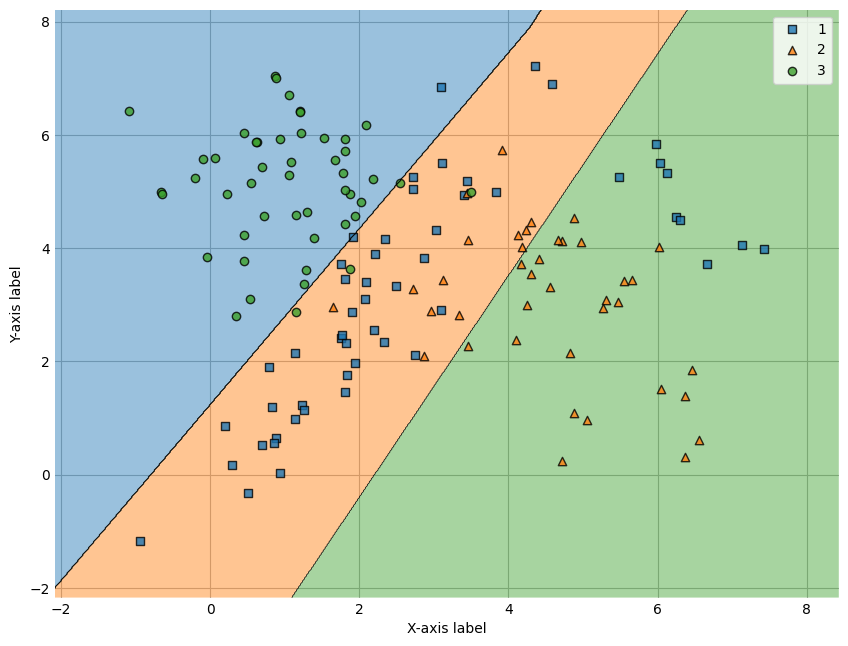

In [6]:
plot_func(X_train, y_train, linear_classifier)

From the diagram above, we notice that the classifier has managed to classify most of our training elements into the correct class, while the classes that have the wrong representations are located in the areas near the decision vectors. Furthermore, we notice that the classifier has managed to define the correct decision vectors.

We call the plot_func function on our testing data and plot our graph.

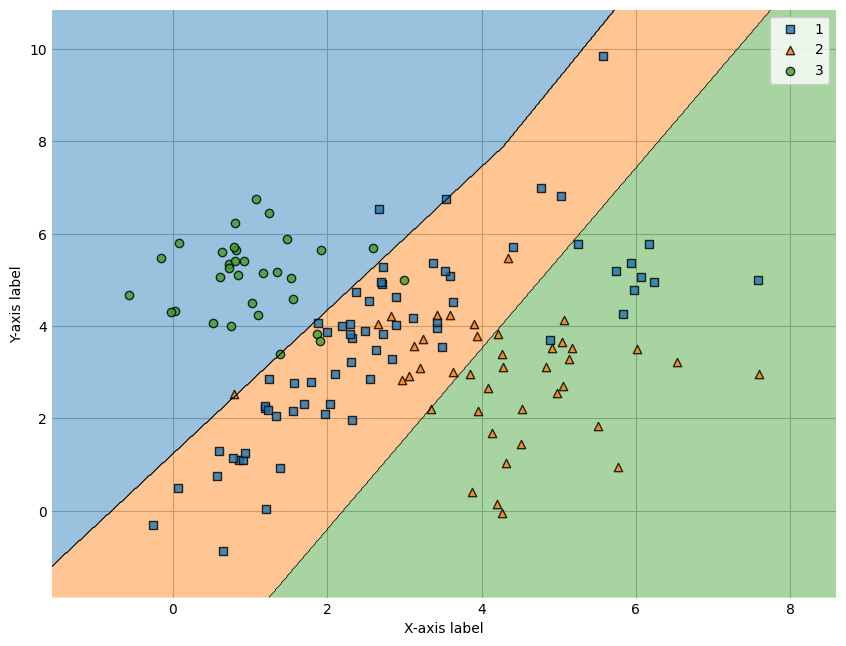

In [7]:
plot_func(X_test, y_test, linear_classifier)

The graph from plot_func using testing data and the linear SVM classifier shows the classifier's performance on unseen data. The decision boundaries indicate how well different classes are separated. Points within correct regions suggest accurate classification, while points in wrong regions indicate misclassifications. With an error rate of about 21.4%, the graph highlights the model's effectiveness and areas for improvement, especially near decision boundaries.

## SVM Classifier with RBF kernel  

After we have already loaded our data we start to define the various values of the hyperparameters C (cost parameter that adjusts the trade-off between the accuracy in the data and the simplicity of the model) and gamma (kernel density parameter) that we want to experiment with. We choose the values [0.001, 0.01, 0.1, 1, 10, 100, 1000 ] that we think help to get a good picture of our classifier. We save our data in a new text file.

In [8]:
C = {0.001, 0.01, 0.1, 1, 10, 100, 1000}
gamma = {0.001, 0.01, 0.1, 1, 10, 100}

We define the train_and_evaluate_classifier function which is responsible for training and evaluating our classifier in a similar way as we did previously in the linear classifier.

In [9]:
def train_and_evaluate_classifier(clf, train_images, train_labels, test_images, test_labels, i, gamma):
    print(f'{clf.__class__.__name__} Classification results for C = {i} and gamma = {gamma}')
    
    # Training
    clf.fit(train_images, train_labels)

    # Prediction on training images
    train_images_prediction = clf.predict(train_images)
        
    # Calculate classification errors for each data point
    classification_errors = (train_images_prediction != train_labels).astype(int)

    # Calculate the average error
    average_error = classification_errors.mean()
    print(f'The average error on the training set is: {average_error}')

    testing_images_prediction = clf.predict(test_images)

    # Calculate classification errors for each data point
    classification_errors = (testing_images_prediction != test_labels).astype(int)

    # Calculate the average error
    average_error = classification_errors.mean()
    print(f'The average error on the testing data set is: {average_error}')  


We then call our classifier for the various values of C and gamma and we save our results in the test file we have created.

In [3]:
from sklearn.svm import SVC
import sys

# Redirect stdout to a file
output_file = "svm_results.txt"
with open(output_file, 'w') as f:
    sys.stdout = f  # Redirect stdout to the file

    for g in gamma:
        for i in C:
            classifier = SVC(kernel='rbf', C=i, gamma=g)
            train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, i, g)

    sys.stdout = sys.__stdout__  # Reset stdout to its original value

We extract our data into a txt file and open them in order to perform further investigation.

In [10]:
# Read data from the file
with open('svm_results.txt', 'r') as file:
    data = file.readlines()

# Initialize lists to store extracted data
C_values, gamma_values, average_training_error, average_testing_error  = [], [], [], []

# Extract data from each line
for line in data:
    if "Classification results" in line:
        # Extract C and gamma values
        C, gamma = map(float, line.split("for C = ")[1].split(" and gamma = ")[0:2])
        C_values.append(C)
        gamma_values.append(gamma)

    # Extract accuracy values
    if "The average error on the training set is:" in line:
        average_training_error.append(float(line.split(":")[1]))

    if "The average error on the testing data set is:" in line:
        average_testing_error.append(float(line.split(":")[1]))

We then convert our lists intto numpy arrays to help us better manipulate them and define a color map for discrete gamma values.

In [11]:
C_values = np.array(C_values)
gamma_values = np.array(gamma_values)
average_training_error = np.array(average_training_error)
average_testing_error = np.array(average_testing_error)

gamma_colors = {0.001: 'red', 0.01: 'green', 0.1: 'blue', 1: 'purple', 10: 'orange', 100: 'brown'}
# Get unique gamma values
unique_gamma_values = np.unique(gamma_values)

We created a Function to plot our SVM results. The function takes various parameters such as `unique_gamma_values`, `C_values`, `accuracy`, `gamma_colors`, `type`, and `string_type` to create informative plots. The plots illustrate the training data accuracy with respect to the regularization parameter (`C`) for different gamma values.

In [12]:
def ploting_func(unique_gamma_values, C_values, accuracy, gamma_colors, type, string_type):
# Plotting Training Data Accuracy
    plt.figure(figsize=(12, 6))
    for gamma in unique_gamma_values:
        # Filter data for each gamma value
        mask = (gamma_values == gamma)
        sorted_indices = np.argsort(C_values[mask])
        plt.plot(C_values[mask][sorted_indices], accuracy[mask][sorted_indices],
                'o-', label=f'{type} {string_type} (Gamma={gamma})', color=gamma_colors[gamma])

    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel(f'{string_type}')
    plt.xscale('log')  # Logarithmic scale for better visualization
    plt.title(f'SVM with rbf kernel Classification {type} {string_type}')
    plt.legend()
    plt.show()

We call the functions to depict the average training data error.

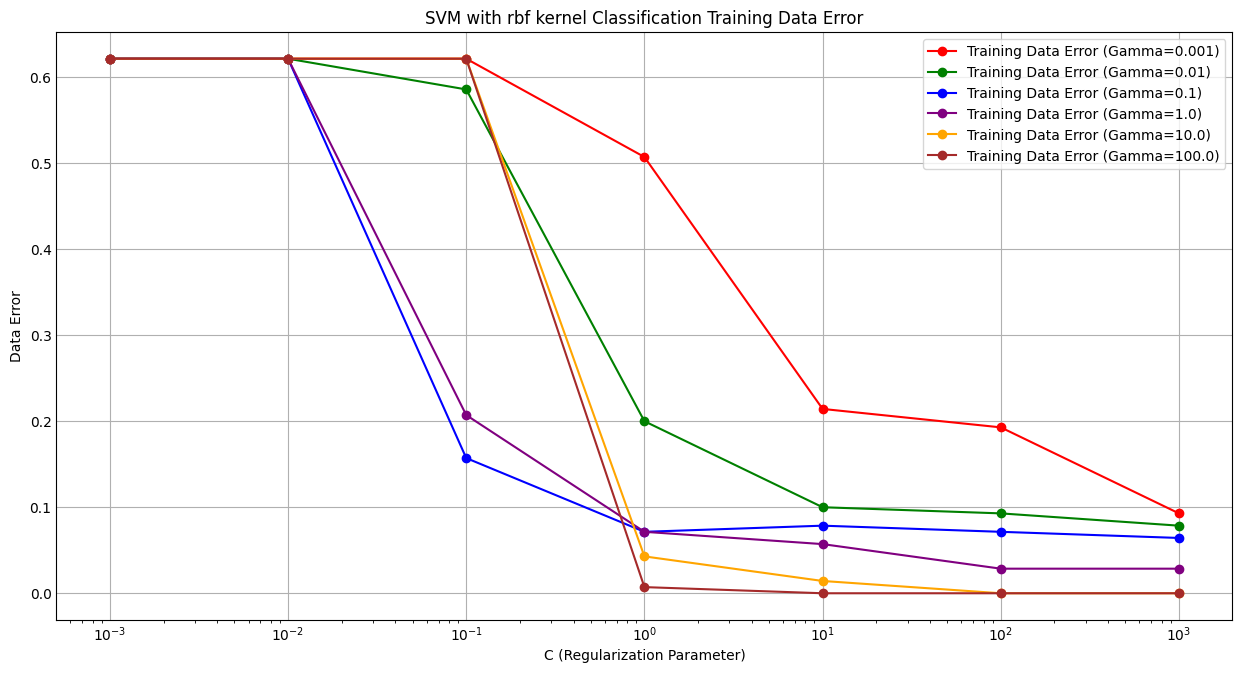

In [13]:
ploting_func(unique_gamma_values, C_values, average_training_error, gamma_colors, 'Training', 'Data Error')

Testing Data Error Graph (SVM with RBF Kernel): This graph highlights how the average testing error varies with different C values for each gamma setting. For higher gamma values like 100, 10, and 1, the error rate remains relatively stable across varying C, suggesting robustness against overfitting. In ontrast, for gamma values lower than 1, the model's performance on the testing data shows more sensitivity to changes in C. Initially, at lower C values, smaller gamma leads to better performance. However, as C increases, particularly beyond C=100, this trend shifts, and classifiers with larger gamma values start to show improved accuracy, demonstrating the intricate balance between C and gamma in model generalization.

We call the functions to depict the average testing data error.

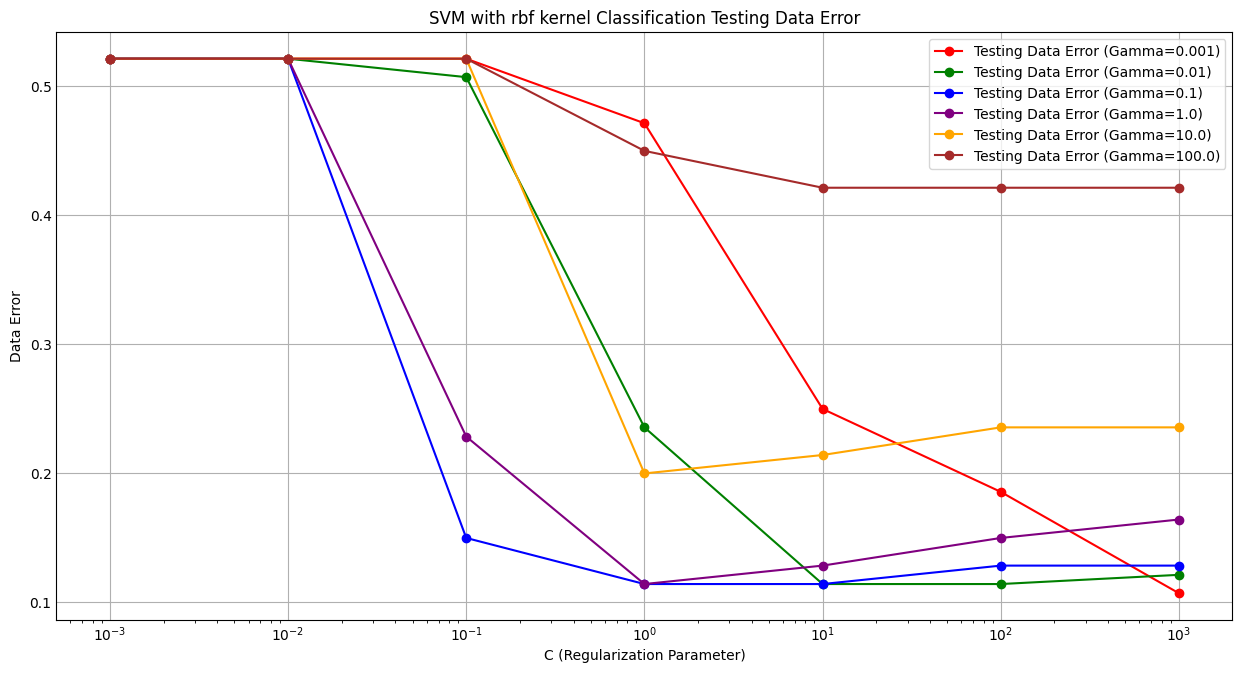

In [14]:
ploting_func(unique_gamma_values, C_values, average_testing_error, gamma_colors, 'Testing', 'Data Error')

Average Training Data Error (SVM with Linear Classifier): In this scenario, the graph indicates a consistent improvement in classifier performance with the increase in C value, regardless of the gamma setting. This trend is particularly pronounced for gamma values of 100, 10, and 1, where the classifier reaches its maximum accuracy quite early and maintains it across different C values. Interestingly, for gamma values less than 1, the classifier shows high accuracy at lower C values, with the accuracy increasing as gamma decreases. Yet, once C exceeds 100, all classifiers converge to a similar level of high accuracy, indicating that beyond this point, the choice of gamma has a negligible impact on the training accuracy.

We notice that in our testing dataset our minimum error appears for `gamma = 0.001` and `C = 1000`. For those values we decided to plot our data using the `svm_plot_decision_regions(X, y, classifier, resolution=0.02)` function that we define.

SVC Classification results for C = 1000 and gamma = 0.001
The average error on the training set is: 0.09285714285714286
The average error on the testing data set is: 0.10714285714285714


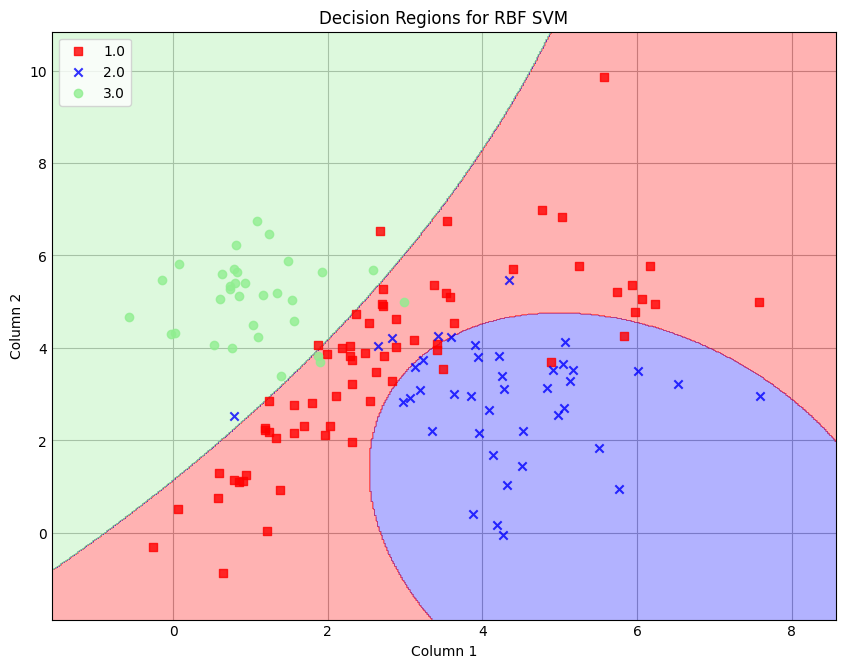

In [33]:
from matplotlib.colors import ListedColormap 

# Define Function to plot decision regions
def svm_plot_decision_regions(X, y, classifier, resolution=0.02):

    # Define markers and colors for different classes
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')

    # Create a ListedColormap for the classes
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Set the plot boundaries based on the input data
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Set the plot boundaries based on the input data
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Use the classifier to predict the class labels for each point in the meshgrid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot decision regions
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Scatter plot for each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

# Create an RBF SVM classifier and train and evaluate it
rbf_classifier = SVC(kernel='rbf', C=1000, gamma=0.001)
train_and_evaluate_classifier(rbf_classifier, X_train, y_train, X_test, y_test, 1000, 0.001)

# Plot decision regions
plt.figure(figsize=(8, 6))
svm_plot_decision_regions(X_test, y_test, rbf_classifier)
plt.title('Decision Regions for RBF SVM')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.legend(loc='upper left')
plt.show()

# Sumperasmata + sugkrish me ta A kai B part 